In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [27]:
X_train = X_train / 255
X_test = X_test / 255
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [28]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=1)

# run `tensorboard --logdir logs/train` in cmd

In [29]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3700 - accuracy: 0.8979
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1513 - accuracy: 0.9542
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0993 - accuracy: 0.9699
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0694 - accuracy: 0.9785
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0526 - accuracy: 0.9834


313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

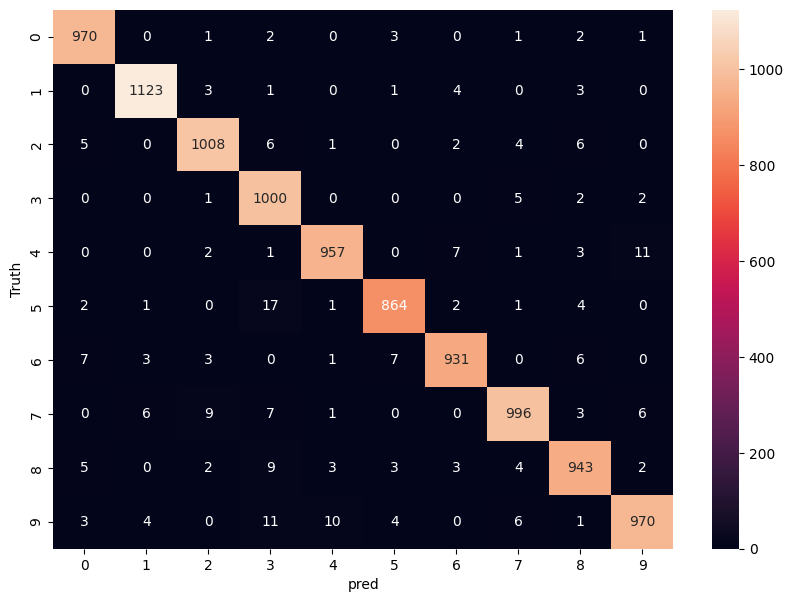

In [30]:
model.evaluate(X_test_flattened,y_test)
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1967 - accuracy: 0.9403
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0863 - accuracy: 0.9736
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0610 - accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0461 - accuracy: 0.9858
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

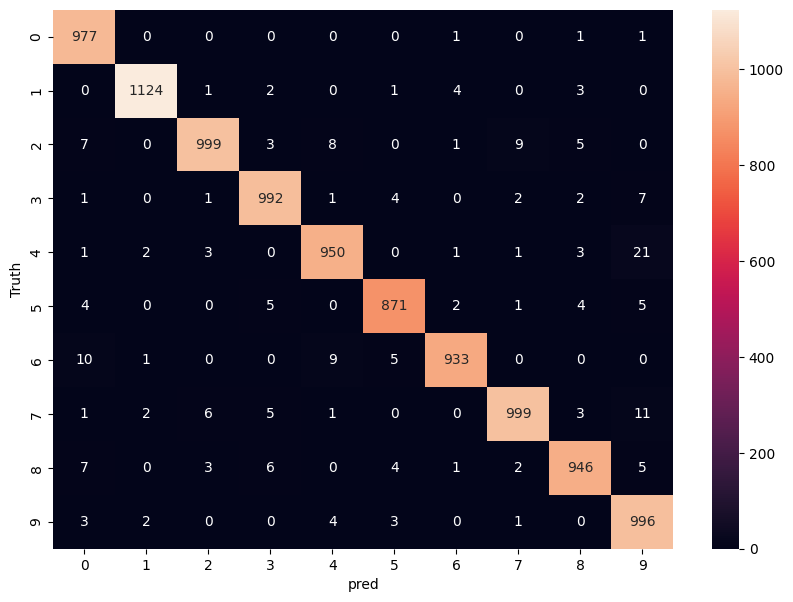

In [32]:
model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

model2.evaluate(X_test,y_test)
y_pred = model2.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')